<a href="https://colab.research.google.com/github/tikhongc/fyp/blob/main/Music_emotion_Deep_learning(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install spotipy

In [ ]:
import spotipy
import csv
import glob
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd
#spotify authorization
cid = '11a595ac08b84deba845647de64addad' 
secret = '1fcdf925efc84aa4add8c3a3e7bfe44a'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Instructions for updating:
non-resource variables are not supported in the long term


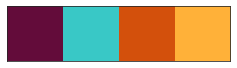

In [ ]:
#Script to obtain data 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils
#Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load Data

In [ ]:
# Import my spotify data
df = pd.read_csv("/content/drive/MyDrive/Dataset/Music-MOOD/Dataset/dataset_mood.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# remove song names, artist and id before clustering
songs_features = df.copy()
songs_features = songs_features.drop(['artist','album','track_name','track_id','duration_ms','genre','key','time_signature'],axis=1)
songs_features

,danceability,energy,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo
0,0.445,0.537,-8.532,0.695000,0.0400,0.000017,0.0944,0.131,122.769
1,0.604,0.366,-7.519,0.578000,0.0282,0.000000,0.1330,0.130,141.981
2,0.824,0.300,-6.678,0.854000,0.0565,0.000000,0.1740,0.227,112.867
3,0.391,0.335,-10.064,0.389000,0.0763,0.000000,0.1020,0.116,174.185
4,0.559,0.763,-4.160,0.403000,0.1050,0.000000,0.1270,0.349,91.069
...,...,...,...,...,...,...,...,...,...
3058,0.547,0.792,-5.645,0.000383,0.0350,0.000259,0.1060,0.395,97.998
3059,0.555,0.883,-3.426,0.001140,0.0341,0.041000,0.8680,0.507,125.020
3060,0.408,0.965,-4.232,0.000007,0.0500,0.000402,0.1100,0.349,136.018
3061,0.641,0.732,-7.570,0.013900,0.0795,0.000003,0.0620,0.763,92.057


# Tranining Model

In order to standardize the features, I used MinMaxScaler to scale the values ​​in the range [0,1] and preserve the shape of the original distribution. I also coded the 4 labels because the neural network uses numerical values ​​for training and testing. Finally, I split the data into 80% for training and 20% for testing

In [ ]:
df

,artist,album,track_name,track_id,duration_ms,danceability,energy,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,key,time_signature,genre
0,Tom Odell,Long Way Down (Deluxe),Another Love,3JvKfv6T31zO0ini8iNItO,244360,0.445,0.537,-8.532,0.695000,0.0400,0.000017,0.0944,0.131,122.769,4,4,sad
1,Adele,Easy On Me,Easy On Me,0gplL1WMoJ6iYaPgMCL0gX,224695,0.604,0.366,-7.519,0.578000,0.0282,0.000000,0.1330,0.130,141.981,5,4,sad
2,Griff,Black Hole (Acoustic Version),Black Hole - Acoustic Version,1cpVLszZnKUHUjsJDTEi3D,175980,0.824,0.300,-6.678,0.854000,0.0565,0.000000,0.1740,0.227,112.867,1,4,sad
3,Benson Boone,GHOST TOWN,GHOST TOWN,135Lf4Q0CzlMNfOxbEUsLH,193733,0.391,0.335,-10.064,0.389000,0.0763,0.000000,0.1020,0.116,174.185,0,3,sad
4,Mimi Webb,24/5,24/5,1A6gT680oQr98VtDkNzys7,158221,0.559,0.763,-4.160,0.403000,0.1050,0.000000,0.1270,0.349,91.069,0,4,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,Highly Suspect,Mister Asylum,Bloodfeather,66Avcq6c51vcMGXLzHH5d7,234093,0.547,0.792,-5.645,0.000383,0.0350,0.000259,0.1060,0.395,97.998,9,4,energetic
3059,Muse,Drones,Psycho,383QXk8nb2YrARMUwDdjQS,316718,0.555,0.883,-3.426,0.001140,0.0341,0.041000,0.8680,0.507,125.020,2,4,energetic
3060,Muse,Origin of Symmetry,Plug in Baby,2UKARCqDrhkYDoVR4FN5Wi,218000,0.408,0.965,-4.232,0.000007,0.0500,0.000402,0.1100,0.349,136.018,2,4,energetic
3061,Pop Evil,UP,Footsteps,47StfXJOnGLhYfMEWgoTiX,262107,0.641,0.732,-7.570,0.013900,0.0795,0.000003,0.0620,0.763,92.057,5,4,energetic


In [ ]:
#定義特徵和目標
col_features = df.columns[5:-3]
#標準化特徵 主要是loudness
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['genre']
col_features

Index(['danceability', 'energy', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_y)
#拆分訓練和測試數據，測試大小為20%
X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.25,random_state=15)
target = pd.DataFrame({'mood':df['genre'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
1392,calm,0
2224,energetic,1
611,happy,2
0,sad,3


In [ ]:
#我用來構建神經網絡的代碼：
def base_model():
    #你可以通过将网络层实例的列表传递给 Sequential 的构造器，来创建一个 Sequential 模型：
    model = Sequential()#定義模型
    #Add 1 layer with 8 nodes,# Input - Layer
    model.add(Dense(8,input_dim=9,activation='relu'))
    #Add 1 layer with softmax function (activation)
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [ ]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


In [ ]:
estimator.fit(X_train,Y_train,batch_size=None,)
y_preds = estimator.predict(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


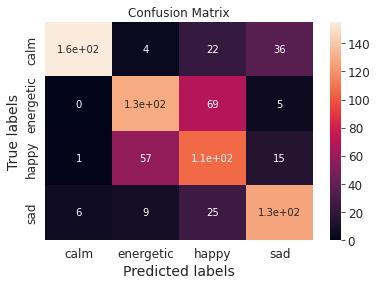

Accuracy Score 0.674934725848564


In [ ]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

#Predicting Song Mood

In [ ]:

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

artist= 'The Weeknd'
track= 'Blinding Lights'

track_info = sp.search(q='artist:' + artist + ' track:' + track, type='track')

trackId = track_info['tracks']['items'][0]['id']

In [ ]:
trackId

'0VjIjW4GlUZAMYd2vXMi3b'

In [ ]:
def get_songs_features(ids):
    
    meta = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    track_name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    duration_ms = meta['duration_ms']
    track_id = meta['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    track = [artist, album, track_name, track_id, duration_ms,danceability, energy, loudness,acousticness,
                              speechiness, instrumentalness, liveness, valence, tempo,key,
                              time_signature]
    columns = ["artist", "album", "track_name", "track_id", "duration_ms","danceability", "energy", "loudness", "acousticness"
                              , "speechiness", "instrumentalness", "liveness", "valence", "tempo", "key",
                              "time_signature"]
    return track, columns

In [ ]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(id_song)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][5:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][2]
    artist = preds[0][0]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")

In [ ]:
predict_mood(trackId)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  after removing the cwd from sys.path.


Blinding Lights by The Weeknd is a ENERGETIC song


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


## Test Song Features

In [ ]:
    ids = '0VjIjW4GlUZAMYd2vXMi3b'
    meta = sp.track(ids)
    features = sp.audio_features(ids)

    # meta
    track_name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    duration_ms = meta['duration_ms']
    track_id = meta['id']

    # features
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    valence = features[0]['valence']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    key = features[0]['key']
    time_signature = features[0]['time_signature']

    track = [artist, album, track_name, track_id, duration_ms, danceability, energy, loudness,acousticness,
                              speechiness, instrumentalness, liveness, valence, tempo,key,
                              time_signature]
    columns = ["artist", "album", "track_name", "track_id", "duration_ms","danceability", "energy", "loudness", "acousticness"
                              , "speechiness", "instrumentalness", "liveness", "valence", "tempo", "key",
                              "time_signature"]

In [ ]:
track

['The Weeknd',
 'After Hours',
 'Blinding Lights',
 '0VjIjW4GlUZAMYd2vXMi3b',
 200040,
 0.514,
 0.73,
 -5.934,
 0.00146,
 0.0598,
 9.54e-05,
 0.0897,
 0.334,
 171.005,
 1,
 4]

In [ ]:
columns

['artist',
 'album',
 'track_name',
 'track_id',
 'duration_ms',
 'danceability',
 'energy',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'key',
 'time_signature']